In [ ]:
'''
Name: Alejandro Garcia Carballo
User: u188873
MIIS
'''

In [39]:
import snap
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt

## Description of the dataset

### First snapshot
Data collected with a crawler until January 16, 2018. It has the data related with the user interactions in this time lapse. The username is anonymized for privacy purposes.

In [110]:
user_interactions = pd.read_csv('data/mastodon_first_snapshot_anonim.csv')
user_interactions.head()

,0@pawoo.net,1@pawoo.net
0,0@pawoo.net,2@pawoo.net
1,3@mastodon.blue,4@mastodon.blue
2,5@imastodon.net,6@pawoo.net
3,5@imastodon.net,7@imastodon.net
4,5@imastodon.net,8@pawoo.net


### Growth from 16/01/2018 to 16/03/2018
Captures the growth of the Mastodon network from 16/01/2108 to 16/03/2018. Each line represents a new directed link and reports.

In [13]:
mastodon_growth = pd.read_csv('data/mastodon_growth_from_1_16_to_3_16_anonim.csv')
mastodon_growth.head()

,52388@mstdn.jp,15606@3.nu,2018-01-21 17:00:04.729000
0,52388@mstdn.jp,784@mstdn.jp,2018-01-21 17:00:04.733000
1,52388@mstdn.jp,8756@pawoo.net,2018-01-21 17:00:04.737000
2,52388@mstdn.jp,1310@mstdn.jp,2018-01-21 17:00:04.740000
3,52388@mstdn.jp,1108@pawoo.net,2018-01-21 17:00:04.743000
4,52388@mstdn.jp,1761@pawoo.net,2018-01-21 17:00:04.746000


### Data instances
Contains the location of the instances.

In [6]:
instances_location = pd.read_json('data/instances_position.json')
instances_location.head()

,Location,CountryCode
00x.club,"{'metro_code': 0, 'country_name': 'France', 'r...",FRA
15m.icolectiva.org,"{'metro_code': 0, 'country_name': 'Spain', 're...",ESP
1oku.net,"{'metro_code': 0, 'country_name': 'Japan', 're...",JPN
2.distsn.org,"{'metro_code': 0, 'country_name': 'Japan', 're...",JPN
3.nu,"{'metro_code': 0, 'country_name': 'Japan', 're...",JPN


### Data instances over time
Reports the number of users, posts and connections for each instance.

In [124]:
instances_info = pd.read_json('data/data_instances_over_time.json')
instances_info.head()

,0.unicomplex.co,00x.club,0xd.0xa.pw,101010.pl,15m.icolectiva.org,1oku.net,2.distsn.org,2ndamendment.social,3.distsn.org,3.nu,...,znark.us,zom.ddns.net,zone53.champemedylan.fr,zou.social,zwitscher.l-uni.co,# Users,# Links,# Statuses,# Instances,Statuses per user
2017-07-19,None,None,None,None,"{'connections': 497, 'statuses': 536, 'users':...","{'connections': 78, 'statuses': 22, 'users': 4}",None,None,None,"{'connections': 1175, 'statuses': 64876, 'user...",...,None,None,None,None,None,768402,517066,41892827,1279,54.519414
2017-07-20,None,None,None,None,"{'connections': 498, 'statuses': 536, 'users':...","{'connections': 78, 'statuses': 23, 'users': 4}",None,None,None,"{'connections': 1177, 'statuses': 65357, 'user...",...,None,None,None,None,None,761567,515838,42084056,1271,55.259821
2017-07-21,None,None,None,None,"{'connections': 498, 'statuses': 537, 'users':...","{'connections': 78, 'statuses': 23, 'users': 4}",None,None,None,"{'connections': 1179, 'statuses': 65932, 'user...",...,None,None,None,None,None,761552,516012,41958499,1264,55.096039
2017-07-22,None,None,None,None,None,"{'connections': 78, 'statuses': 23, 'users': 4}",None,None,None,"{'connections': 1181, 'statuses': 66593, 'user...",...,None,None,None,None,None,762182,512960,42226472,1255,55.402085
2017-07-23,None,None,None,None,None,"{'connections': 78, 'statuses': 23, 'users': 4}",None,None,None,"{'connections': 1182, 'statuses': 67317, 'user...",...,None,None,None,None,None,763136,516113,42488411,1255,55.676067


### Instances topics
Contains the topics associated with each instance.

In [125]:
instance2topics = json.load(open('data/instances_topics.json','r'))
#print(instance2topics.keys())
instance2topics

{'tootme.de': {'description': 'Rules\r\nTootme.de server is run and provided voluntarily. There are some rules to make living together peacefully possible. You accept these rules by creating an account on this server. In general German law applies to this instance, since the service is run in a german datacenter. Violation of these laws will be prosecuted. Additionally the following community guidelines apply:\r\nForbidden:\r\n\r\n    Running Bots\r\n    Pornography\r\n    „Spamming“\r\n    Insulting and persecuting users or groups\r\n    Spreading and supporting racist, sexist, nazi, anti-democratic, inhuman, homophobic or extremist content.\r\n\r\nYou shall:\r\n\r\n    Be nice, helpful and tolerant to each other\r\n    Fight racism and discrimination\r\n    Respect each other\r\n    Flag forbidden content\r\n    Tag content as „NSFW“ (“not safe for work“) if it might offend or disturb users.\r\n\r\nThe provider of this service will remove content at his own discretion if it does not 

### Loading user interactions correct format


In [126]:
graph_df = pd.read_csv('data/mastodon_first_snapshot_anonim_tab.csv', sep='\t', header=None)

### Adding attributes to the node

In [127]:
graph_df.columns = ["Source", "Target"]
graph_df.head()

,Source,Target
0,0@pawoo.net,1@pawoo.net
1,0@pawoo.net,2@pawoo.net
2,3@mastodon.blue,4@mastodon.blue
3,5@imastodon.net,6@pawoo.net
4,5@imastodon.net,7@imastodon.net


In [128]:
#Adding only the instance to the dataframe
graph_df['Instance'] = graph_df['Source'].str.split('@', 1, expand=True)[1]

In [129]:
graph_df.to_csv('data/with_instances.csv', sep='\t', index=False)

In [130]:
graph_df.head()

,Source,Target,Instance
0,0@pawoo.net,1@pawoo.net,pawoo.net
1,0@pawoo.net,2@pawoo.net,pawoo.net
2,3@mastodon.blue,4@mastodon.blue,mastodon.blue
3,5@imastodon.net,6@pawoo.net,imastodon.net
4,5@imastodon.net,7@imastodon.net,imastodon.net


In [3]:
#graph_df = pd.read_csv('data/mastodon_first_snapshot_anonim.csv', sep=',', header=None, names=['source','target'])
#graph_df.to_csv('data/mastodon_first_snapshot_anonim_tab.csv', sep='\t', index=False, header=False)
G = snap.LoadEdgeListStr(snap.PNGraph,'data/mastodon_first_snapshot_anonim_tab.csv',0,1)

 ### Size of the giant component
 It is the largest connected component of the network

In [44]:
# Get largest WCC
MxWcc = snap.GetMxWcc(G)
print("max wcc nodes %d, edges %d" % \
    (MxWcc.GetNodes(), MxWcc.GetEdges()))


max wcc nodes 479425, edges 5649762


In [45]:
# Get WCC sizes
WccV = snap.TIntPrV()
snap.GetWccSzCnt(G, WccV)

print("# of connected component sizes", WccV.Len()) 
for comp in WccV:
    print("size %d, number of components %d" % \
        (comp.GetVal1(), comp.GetVal2()))

# of connected component sizes 1
size 479425, number of components 1


The number of Weakly Connected Components is 1, so there only exist a giant component in this graph. It does not contain any outliner.

### Average path length and diameter (only for the giant component)
- Effective diameter: Deff (90% percentile of all the distances)
- Diameter: Maximal distance D of all distances between all possible pairs of users.
- Average path length: is a concept in network topology that is defined as the average number of steps along the shortest paths for all possible pairs of network nodes

In [46]:
# A graph method that returns the approximation of the effective diameter, the diameter, and 
# the average shortest path length in a graph.
result = G.GetBfsEffDiamAll(1022, True)
print('Effective diameter: {}'.format(result[0]))
print('Diameter: {}'.format(result[2]))
print('Average shortest path length: {}'.format(result[3]))

Effective diameter: 4.736406744126832
Diameter: 10
Average shortest path length: 4.066952308128367


### Degree distribution
The degree of a node in a network is the number of connections it has to other nodes.

Text(0.5, 0, 'in-degree')

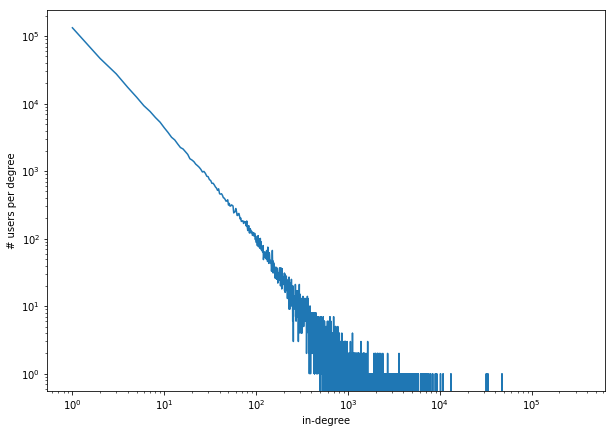

In [7]:
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(G, InDegV)
a = np.arange(1, snap.CntNonZNodes(G) - snap.CntInDegNodes(G,0) +2)
i=0
for item in InDegV:
    if item.GetVal2() > 0 :
        a[i]=item.GetVal2()
        i+=1
        
bars, bins=np.histogram(a,bins=np.arange(1,max(a)))
%matplotlib inline
import matplotlib.pyplot as plt; 
plt.rcParams['figure.figsize'] = [10, 7]
plt.loglog(bins[0:-1],bars)
plt.ylabel('# users per degree')
plt.xlabel('in-degree')

### Clustering coefficient
Local clustering coefficient measures the density of connections between the direct neighbours of a user.

In [9]:
# Number of nodes
print('Number of nodes: {}'.format(G.GetNodes()))
# If SampleNodes is -1 (default value), then compute the clustering coefficient over all the nodes
GraphClustCoeff = G.GetClustCf(-1)
# Cluster coefficient larger than 0
print('Clustering coefficient over all the nodes: {}'.format(GraphClustCoeff))

Number of nodes: 479425
Clustering coefficient over all the nodes: 0.36687064488493704


### PageRank

In [10]:
# Calculate node PageRank scores
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)

In [11]:
# sort them
sorted_PRankH = sorted(PRankH, key = lambda key: PRankH[key], reverse = True)

In [12]:
# print top n nodes with highest Pagerank
for item in sorted_PRankH[0:10]:
    print(item, PRankH[item])

73 0.010462126877636473
65 0.010166242466711415
64 0.007128558983626104
931 0.0058603567843680746
23887 0.004506653310015289
89 0.00362541211278001
421 0.0029447205783764796
2380 0.001923502780474355
68 0.0017414807802272805
1 0.001675173305968427


###  Centrality measures

In [72]:
betweenness_centrality = nx.betweenness_centrality(G2, k=100)

In [73]:
higher_betwenness_c = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]
for node in higher_betwenness_c:
    print("Node: {0}".format(node))
    print("Value: {0}".format(betweenness_centrality[node]))


Node: 1@mastodon.cloud
Value: 0.07448695511267979
Node: 1124@mastodon.host
Value: 0.07194519438390394
Node: 73@pawoo.net
Value: 0.05295071226681399


## Mixing coefficients

In [131]:
# Creating network x graph from a pandas dataframe
G2 = nx.from_pandas_edgelist(graph_df, source='Source', target='Target',create_using=nx.DiGraph())

In [132]:
# Adding 'Instance' attribute to the nodes
nx.set_node_attributes(G2, pd.Series(graph_df.Instance.values, index=graph_df.Source).to_dict(), 'Instance')

In [76]:
nx.get_node_attributes(G2, "Instance")

{'0@pawoo.net': 'pawoo.net',
 '1@pawoo.net': 'pawoo.net',
 '2@pawoo.net': 'pawoo.net',
 '3@mastodon.blue': 'mastodon.blue',
 '4@mastodon.blue': 'mastodon.blue',
 '5@imastodon.net': 'imastodon.net',
 '6@pawoo.net': 'pawoo.net',
 '8@pawoo.net': 'pawoo.net',
 '9@imastodon.net': 'imastodon.net',
 '11@imastodon.net': 'imastodon.net',
 '12@imastodon.net': 'imastodon.net',
 '13@pawoo.net': 'pawoo.net',
 '14@pawoo.net': 'pawoo.net',
 '15@imastodon.net': 'imastodon.net',
 '16@imastodon.net': 'imastodon.net',
 '17@imastodon.net': 'imastodon.net',
 '19@mstdn.jp': 'mstdn.jp',
 '20@mstdn.jp': 'mstdn.jp',
 '21@mstdn.jp': 'mstdn.jp',
 '22@mstdn.jp': 'mstdn.jp',
 '23@pawoo.net': 'pawoo.net',
 '24@pawoo.net': 'pawoo.net',
 '25@pawoo.net': 'pawoo.net',
 '26@pawoo.net': 'pawoo.net',
 '27@pawoo.net': 'pawoo.net',
 '28@pawoo.net': 'pawoo.net',
 '29@pawoo.net': 'pawoo.net',
 '30@pawoo.net': 'pawoo.net',
 '31@pawoo.net': 'pawoo.net',
 '32@pawoo.net': 'pawoo.net',
 '33@pawoo.net': 'pawoo.net',
 '34@pawoo.net'

In [133]:
# Calculating assortativity coefficient respect to the Instance attribute
g_instance_coeff = nx.attribute_assortativity_coefficient(G2, 'Instance')
print(g_instance_coeff)

0.5000667895289361


r > 0: assortative mixing
I There exists a preference for relations between
similar users.
I Users with many contacts relate preferentially
among themselves and vice versa

In [ ]:
# Calculating degree assortativity coefficient
nx.degree_assortativity_coefficient(G2, x='in', y='in')
#ERROR: Memoria

### K-core decomposition

In [134]:
Gk200 = nx.k_core(G2, k=200)

In [19]:
print(Gk200.number_of_nodes())
print(Gk200.number_of_edges())

2611
544437


In [79]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

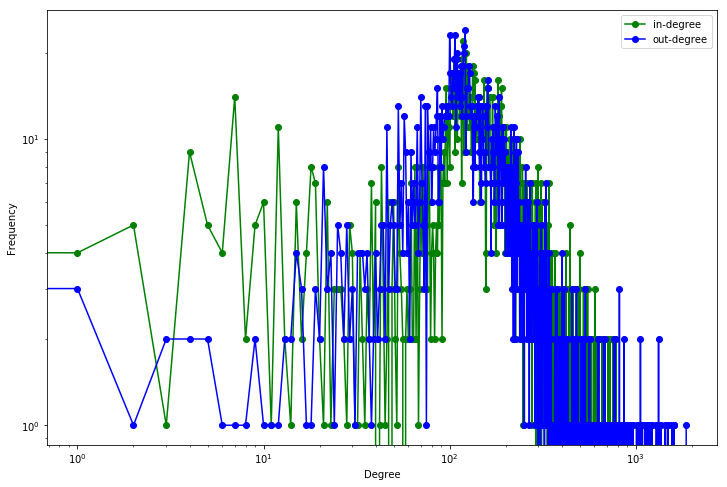

In [80]:
#printar otras caracteristicas y degree distribution
in_degree_freq = degree_histogram_directed(Gk200, in_degree=True)
out_degree_freq = degree_histogram_directed(Gk200, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

In [136]:
nx.write_edgelist(Gk200, 'data/k-core200.csv', delimiter='\t', data=False)

In [135]:
def make_node_df(G):
    nodes = []
    for node, attribute in G.nodes(data=True):        
        if 'Instance' in attribute:        
            instance = attribute['Instance']
            node_values = [node, instance]
        else:
            node_values = [node, ""]
        nodes.append(node_values)

    return pd.DataFrame.from_records(nodes, columns=['Node','Instance'])

In [137]:
nodes_with_attr = make_node_df(Gk200)

In [ ]:
nodes_with_attr.to_csv('data/k-core200_nodes.csv', index=False)

In [138]:
# Calculating assortativity coefficient respect to the Instance attribute
gk200_instance_coeff = nx.attribute_assortativity_coefficient(Gk200, 'Instance')
print(gk200_instance_coeff)

0.4981586586752165


In [139]:
# Calculating degree assortativity coefficient
gk200_in_in_coeff = nx.degree_assortativity_coefficient(Gk200, x='in', y='in')
print(gk200_in_in_coeff)

-0.1837583950092069


In [140]:
# Calculating degree assortativity coefficient
gk200_in_out_coeff = nx.degree_assortativity_coefficient(Gk200, x='in', y='out')
print(gk200_in_out_coeff)

-0.07923085718180209


In [141]:
# Calculating degree assortativity coefficient
gk200_out_in_coeff = nx.degree_assortativity_coefficient(Gk200, x='out', y='in')
print(gk200_out_in_coeff)

-0.22074030998493072


In [142]:
# Calculating degree assortativity coefficient
gk200_out_out_coeff = nx.degree_assortativity_coefficient(Gk200, x='out', y='out')
print(gk200_out_out_coeff)

-0.10371096390554227


### Topics assortativity

Printing the available instances in the dataset about the user interactions and the instances in the topics dataset

In [143]:
unique_instances = graph_df.Instance.unique()
print(len(unique_instances))
for instance in unique_instances:
    print(instance)

3636
pawoo.net
mastodon.blue
imastodon.net
mstdn.jp
mastodon.nuzgo.net
mastodon.social
toot.cafe
mao.daizhige.org
icosahedron.website
mimumedon.com
mastodon.cloud
xn--uiq450e.club
friends.nico
mastodon.muage.org
mastodon.cx
glitch.social
fosstodon.org
mastodon.technology
niu.moe
social.pueseso.club
tooot.im
mastodon.partipirate.org
mastodon.xyz
social.ballpointcarrot.net
mastodon.etalab.gouv.fr
mastodon.marf.ovh
eizodon.jp
cybre.space
mastodon.rocks
mastodon.sdf.org
botsin.space
occitanie.social
framapiaf.org
hostux.social
mastodon.fu-jp.net
mastodon.nara.jp
toot.cat
mstdn.awa.sfc.keio.ac.jp
elekk.xyz
mastodon.art
octodon.social
queer.party
animalliberation.social
tokamstdn.jp
ro-mastodon.puyo.jp
mental.social
abyss.fun
mamot.fr
shadowverse-mstdn.jp
witches.town
lou.lt
g0v.social
vocalodon.net
noagendasocial.com
himastdon.club
mastodon.paas.jp
selfy.army
mastodon.hackerlab.fr
social.tchncs.de
im-in.space
mastodon.at
ichiji.social
kokokokko.com
aqua-graphic.blue
mastodon.host
oc.todon.f

akiba.tokyo.jp
social.cypou.net
mstdn.a-apple.net
mstdn.otakan.jp
mastodon.koteitan.com
umastodon.jp
mstdn.chogawa-bunko.com
mstdn.haru2036.com
voluntaryaction.network
balkan.fedive.rs
truecolors.space
genkai.masto.host
voluntary.world
minakami.blue
mastodon.macsnet.cz
mastodon2.lithium03.info
goofs.space
mstdn.ler.jp
pao.moe
hodl.city
sakoku.jp
hikarin.m.to
ali.delbertbeta.cc
mastodon.latransition.org
social.reekynet.com
mastodon.oss.nagoya
so-called.life
owata.m.to
torontomusic.cloud
m.4ac.me
piscolabis.me
muhroads.party
porntoot.com
social.koyu.space
mastodon.cool
training-fitness.fun
mastodon.aquarla.net
mxe.pw
w3r.jp
go-newbie.club
mastodon.kumano-ryo.tech
on.vu
dancingbanana.party
astodon.com
social.rbs.io
pony.social
mountainpeoples.m.to
doshidon.com
mastodon.sylphid.jp
mastodon.zenger.nl
mastodon.abrizero.fr
social.bluecore.net
mabodon.tofulab.jp
t.con.sh
pnw.social
crazynoisybizarre.town
kkczjpn.m.to
mstdn.syaroshi.co
playstation-sns.com
mstdn.bari-ikutsu.com
koreus.social
eli

nitic-mstdn.hostdon.jp
freeskate.fr
mstdn.untan.xyz
sdfn-01.ninjawedding.org
mastodon.limilo.com
mstdn-kichijoji.tokyo
rettiwtkcuf.social
dokushodon.life
plaz.masto.host
mastodon.deafpros.com
neverno.one
mstdon.robox.org
social.oupsman.fr
social.keenfamily.us
orz.uno
mikmak.fr
dimetrodon.n3tsphere.org
mstdn-cycle.com
manhater.io
pwning.social
fudanshi.org
toot.jreinert.com
raccoon.network
mastodon.gnieh.org
mstdn.ouk.jp
hacase.m.to
mastd.me
caffeinatedfriends.club
myriad.social
mstdn.7kry.net
mammuth.ryo-saeba.xyz
toot.dessert.coffee
mastodon.datyedyeguy.net
yart.me
mstdn.phonolo.gy
k3i.pw
tescher.me
noveldon.com
mastodon.xsteadfastx.org
cathuman.m.to
rabe.masto.host
node.dallashackers.com
mstdn.xn--h1ahnbk7d.xn--p1ai
mstdn.calculator29.com
soc.bckly.com
mastodon.thiesen.berlin
lupinus.bouquet.blue
dirus.io
mastube.jp
dobesta.com
morichan.site
network.reyesbros.fr
altfurry.xyz
toot.playgames.jp
iwami-mastodon.herokuapp.com
niigata.minnna.xyz
xn--0n8ha.ws
m.socialjustice.engineering
mst

indxio.info
sungo.io
mastodon.firc.de
m.plop.cc
ananc.us
hasetsu.net
mastodon.blog-de-michel.fr
yuki.tech
postdon.com
mstdn.elephas.cloud
mastodon.thequietplace.social
mstdn.seitaro.me
mastodon.xtity.com
don.asama.net
belette.club
md.nii.so
mastodon.kolombo.xyz
mastodon.crosse.org
disney.host
pouet.citizenz.info
m3.ma3ki.net
cryptid.club
gendon.jp
banthamilk.blue
redsnow.io
mastodon.berlin
mstdn-tw.com
social.0x80.org
mastodon.work
mstdn.cirnoq.org
social.masharih.me
social.timshomepage.net
chocomint.m.to
social.java.nrw
kaiba.ga
real-escape.jp
tusk.what.re
mastodon.gracie-tech.tokyo
tamakodon.jp
hello.deamandel.co
mstdn.cometeo.com
kiwaitsu.m.to
satocc.biz
toot.mad-scientist.club
hstcsl.jp
comico.m.to
hiya.mizucoffee.net
complex.m.to
eizi2002.m.to
libera.blue
ramendon.jp
darkest-timeline.com
lazy8.social
socialtuna.net
typing.sexy
mstdn.enjinm7.com
mastodon.syleogroup.fr
mastodon.le-gras.fr
warubure.online
farts.club
mastodon.nestegg.net
m.dumez.info
social.papill0n.org
mstdn.netaka.n

mastodoll.hiten.org
grimoire.kanzakiranko.jp
mastodon.gamecircle.nova.0am.jp
mdon.ee
mastodon.lndvll.se
agoni.news
babble.world
mstdn-vn.com
msgdn.xyz
mastodon.pocka.info
mastodon.scoffoni.net
m.sysi.work
ramen.m.to
sakuradon.m.to
mstdn.lalafell.org
mastodon.z1lk.net
japanlions.club
kyokoi.ddns.net
unshaped.space
mastodon.cyber-tribal.com
mastodon.osyakasyama.me
toot.works
t.cityrun.in
toot.3stadt.com
sc.sigmaris.info
mstdn.morohoshifamily.com
mstdn.shisaku.tokyo
tootin.tokyo
social.ezramiguel.me
57577.masto.host
mastodon.103.ms
youlog.net
swast.club
takibi.m.to
social.matej-lach.me
mstdn.akiba.ninja
pridelands.io
from.komic.eu
tk2-203-11173.vs.sakura.ne.jp
yamagatadon.com
mastodon.sk
mastodon.jamesmwright.com
foxiepa.ws
mastochizuru.xyz
md.cryo.jp
cxt.masto.host
mastodon.jtwp470.net
sisi.m.to
dumbo.nabago.net
murcier.fr
anomalocaris.link
metaldon.com
mastodon.sbrk.org
social.eyraud.net
poppoko.m.to
mastodon.therianthro.pe
mrt.al
polymatic.social
mstdn.kemonox.jp
scicomm.xyz
atxcoop.cl

In [57]:
print(len(instance2topics.keys()))
for topic in instance2topics.keys():
    print(topic)

320
tootme.de
kurage.cc
im-in.space
august-don.site
libertarian.chat
newtype.institute
mstdn.wildtree.jp
uldhaar.dk
hispagatos.space
chiji.space
tootplanet.space
animedon.tk
mstdn.lesamarien.fr
pouet.panglossoft.fr
mastodon.juggler.jp
ultrix.me
mstdn.m4sk.in
octodon.social
social.arnip.org
fudanshi.org
wug.fun
lgbt.io
sn.angry.im
spladoon.yuzulia.com
social.buffalomesh.net
gldon.hostdon.jp
ieji.de
mastodon.home.js4.in
social.alex73630.xyz
canislupus.im
guimik.fr
edge.mstdn.jp
unixcorn.xyz
mastodon.blue
epsilon.social
squid.cafe
pso2.club
corrigan.moe
social.taker.fr
chaos.social
acid.wtf
social.tilde.team
vidja.social
tegedon.net
social.glados.ch
mastodon.retrodigital.net
chaosphere.hostdon.jp
mastodon.hong.io
hostux.social
mikumikudance.cloud
angel.innolan.net
m.bonzoesc.net
mastodonti.co
inari.opencocon.org
freehold.earth
bookwitty.social
manx.social
kiminona.co
idolish7.fun
mastodonserver.se
toot.aquilenet.fr
7nw.eu
masto.donte.com.br
tomitodon.huideyeren.info
m4570.xyz
anarchism.sp

In [60]:
print(len(list(set(unique_instances).intersection(instance2topics.keys()))))

306


A possible idea is to add attributes to the node in order to calculate assortativity with respect to a given attribute, but we can see that the topic dataset does not match with the user interactions one, so In order to calculate assortativity in respect to the topic we will need to flter nodes and only use that nodes that are available in both user interaction and topics datasets.

In [144]:
available_topics_nodes = graph_df[graph_df['Instance'].isin(instance2topics.keys())]
available_topics_nodes.head()

,Source,Target,Instance
2,3@mastodon.blue,4@mastodon.blue,mastodon.blue
16,19@mstdn.jp,20@mstdn.jp,mstdn.jp
17,19@mstdn.jp,21@mstdn.jp,mstdn.jp
18,19@mstdn.jp,22@mstdn.jp,mstdn.jp
57,66@toot.cafe,67@mastodon.social,toot.cafe


In [145]:
available_topics_nodes['Topics'] = available_topics_nodes.Instance.apply(lambda x: instance2topics[x]['topic'].lower())
available_topics_nodes.head()

C:\Users\alexg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Source,Target,Instance,Topics
2,3@mastodon.blue,4@mastodon.blue,mastodon.blue,
16,19@mstdn.jp,20@mstdn.jp,mstdn.jp,
17,19@mstdn.jp,21@mstdn.jp,mstdn.jp,
18,19@mstdn.jp,22@mstdn.jp,mstdn.jp,
57,66@toot.cafe,67@mastodon.social,toot.cafe,"general, web, javascript, css"


In [ ]:
available_topics_nodes.to_csv('data/topics_nodes.csv', sep='\t')

In [146]:
# Creating network x graph from a pandas dataframe
GTopics = nx.from_pandas_edgelist(available_topics_nodes, source='Source', target='Target',create_using=nx.DiGraph())

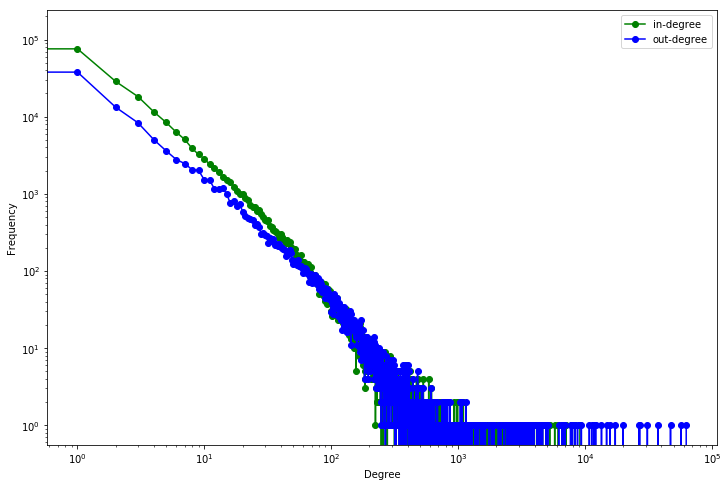

In [87]:
#printar otras caracteristicas y degree distribution
in_degree_freq = degree_histogram_directed(GTopics, in_degree=True)
out_degree_freq = degree_histogram_directed(GTopics, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

In [147]:
# Adding 'Instance' attribute to the nodes
nx.set_node_attributes(GTopics, pd.Series(available_topics_nodes.Instance.values, index=available_topics_nodes.Source).to_dict(), 'Instance')
nx.set_node_attributes(GTopics, pd.Series(available_topics_nodes.Topics.values, index=available_topics_nodes.Source).to_dict(), 'Topics')

In [148]:
# Calculating assortativity coefficient respect to the Instance attribute
gtopics_topics_coeff = nx.attribute_assortativity_coefficient(GTopics, 'Topics')
print(gtopics_topics_coeff)

0.24596137897173842


In [149]:
# Calculating assortativity coefficient respect to the Instance attribute
gtopics_instance_coeff = nx.attribute_assortativity_coefficient(GTopics, 'Instance')
print(gtopics_instance_coeff)

0.35279597273260144


### Node rewiring

In [18]:
Gk200U = Gk200.to_undirected()

In [35]:
#Graph with the same degree than the original
rewired_k200U = nx.random_reference()

In [60]:
def random_reference(G, niter=1, connectivity=True, seed=None, fraction=1.0): #< fraction kwarg was added
    """Compute a random graph by swapping edges of a given graph.

    Parameters
    ----------
    G : graph
        An undirected graph with 4 or more nodes.

    niter : integer (optional, default=1)
        An edge is rewired approximately `niter` times.

    connectivity : boolean (optional, default=True)
        When True, ensure connectivity for the randomized graph.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    fraction: fraction of edges that undergo rewiring #<

    Returns
    -------
    G : graph
        The randomized graph.

    Notes
    -----
    The implementation is adapted from the algorithm by Maslov and Sneppen
    (2002) [1]_.

    References
    ----------
    .. [1] Maslov, Sergei, and Kim Sneppen.
           "Specificity and stability in topology of protein networks."
           Science 296.5569 (2002): 910-913.
    """
    if G.is_directed():
        msg = "random_reference() not defined for directed graphs."
        raise nx.NetworkXError(msg)
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")

    from networkx.utils import cumulative_distribution, discrete_sequence
    local_conn = nx.connectivity.local_edge_connectivity
    import random  #< needed to replace seed.choice below. 

    G = G.copy()
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    nnodes = len(G)
    nedges = nx.number_of_edges(G)
    niter = niter*nedges
    # ntries = int(nnodes*nedges/(nnodes*(nnodes-1)/2)) #< original version
    ntries = int(fraction * nedges) #<
    if ntries % 2 !=0: #< ensure even numbers
        ntries += 1 #<

    swapcount = 0

    for i in range(niter):
        n = 0
        while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf, seed=seed)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = random.choice(list(G.neighbors(a)))  #< changed seed.choice to random.choice
            d = random.choice(list(G.neighbors(c)))  #< changed seed.choice to random.choice
            bi = keys.index(b)
            di = keys.index(d)
            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                G.add_edge(a, d)
                G.add_edge(c, b)
                G.remove_edge(a, b)
                G.remove_edge(c, d)

                # Check if the graph is still connected
                if connectivity and local_conn(G, a, b) == 0:
                    # Not connected, revert the swap
                    G.remove_edge(a, d)
                    G.remove_edge(c, b)
                    G.add_edge(a, b)
                    G.add_edge(c, d)
                else:
                    swapcount += 1
                    print(swapcount)
                    break
            n += 1
    return G

In [ ]:
Gk200rewired = snap.ConvertGraph(snap.PUNGraph, Gk200U)

This function has been executed trying to rewire the graph with k-core 200, but the time execution was very slow, it didn't arrive to finish. Because of this, I will use instead a directed configuration model with the same degree distribution and add attributes to the nodes randomly. 

### Directed configuration model

In [150]:
in_degrees = [val for (node, val) in Gk200.in_degree()]

In [151]:
out_degrees = [val for (node, val) in Gk200.out_degree()]

In [152]:
config_mod = nx.directed_configuration_model(in_degrees, out_degrees)

In [111]:
config_mod.is_directed()

True

In [43]:
print(config_mod.number_of_edges())
print(config_mod.number_of_nodes())

544437
2611


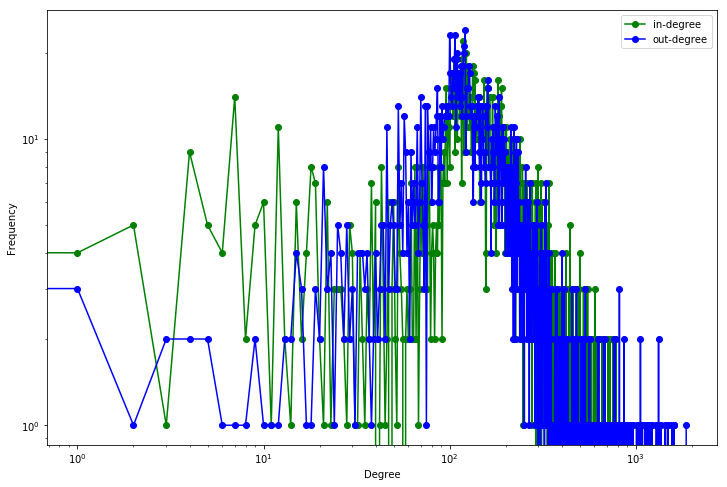

In [91]:
#printar otras caracteristicas y degree distribution
in_degree_freq = degree_histogram_directed(config_mod, in_degree=True)
out_degree_freq = degree_histogram_directed(config_mod, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

In [153]:
df_k200 = pd.read_csv('data/k-core200.csv', sep='\t')

In [107]:
len(df_k200.Instance.unique())

77

In [154]:
df_k200.columns = ['Source', 'Target']
df_k200['Instance'] = df_k200['Source'].str.split('@', 1, expand=True)[1]

In [155]:
index_k200 = np.arange(df_k200.shape[0])
np.random.shuffle(index_k200)            

In [156]:
# Adding 'Instance' attribute to the nodes
nx.set_node_attributes(config_mod, pd.Series(df_k200.Instance.values, index=index_k200).to_dict(), 'Instance')

In [157]:
# Calculating assortativity coefficient respect to the Instance attribute
conf_model_instance_coeff = nx.attribute_assortativity_coefficient(config_mod, 'Instance')
print(conf_model_instance_coeff)

0.00020604830026804756


In [158]:
# Calculating degree assortativity coefficient
conf_in_in_coeff = nx.degree_assortativity_coefficient(config_mod, x='in', y='in')
print(conf_in_in_coeff)

0.00012775150622080218


In [159]:
# Calculating degree assortativity coefficient
conf_out_in_coeff = nx.degree_assortativity_coefficient(config_mod, x='out', y='in')
print(conf_out_in_coeff)

8.08519911483582e-05


In [160]:
# Calculating degree assortativity coefficient
conf_in_out_coeff = nx.degree_assortativity_coefficient(config_mod, x='in', y='out')
print(conf_in_out_coeff)

-0.00040414780920312567


In [161]:
# Calculating degree assortativity coefficient
conf_out_out_coeff = nx.degree_assortativity_coefficient(config_mod, x='out', y='out')
print(conf_out_out_coeff)

0.0006309803210409107


### Directed Configuration Model with topics

In [162]:
in_degrees_topics = [val for (node, val) in GTopics.in_degree()]
out_degrees_topics = [val for (node, val) in GTopics.out_degree()]

In [163]:
config_mod_topics = nx.directed_configuration_model(in_degrees_topics, out_degrees_topics)

Text(0, 0.5, 'Frequency')

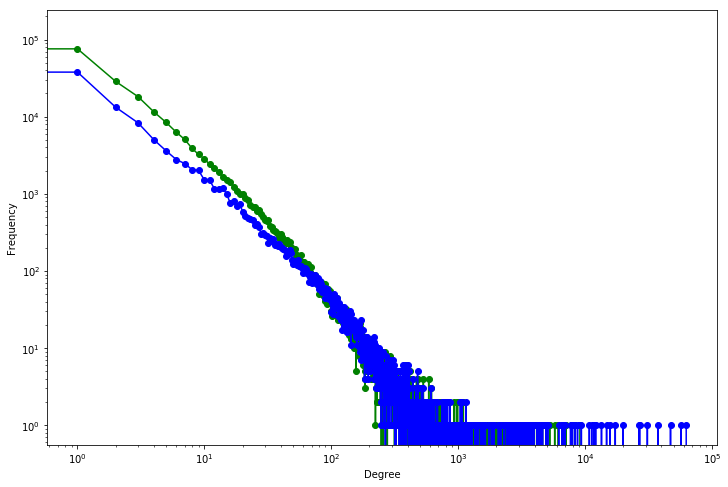

In [73]:
#printar otras caracteristicas y degree distribution
in_degree_freq = degree_histogram_directed(config_mod_topics, in_degree=True)
out_degree_freq = degree_histogram_directed(config_mod_topics, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [164]:
df_topics = pd.read_csv('data/topics_nodes.csv', sep='\t')
df_topics.head()

,Unnamed: 0,Source,Target,Instance,Topics
0,2,3@mastodon.blue,4@mastodon.blue,mastodon.blue,NaN
1,16,19@mstdn.jp,20@mstdn.jp,mstdn.jp,NaN
2,17,19@mstdn.jp,21@mstdn.jp,mstdn.jp,NaN
3,18,19@mstdn.jp,22@mstdn.jp,mstdn.jp,NaN
4,57,66@toot.cafe,67@mastodon.social,toot.cafe,"general, web, javascript, css"


In [165]:
index_topics = np.arange(df_topics.shape[0])
np.random.shuffle(index_topics)  

In [166]:
# Adding 'Instance' attribute to the nodes
nx.set_node_attributes(config_mod_topics, pd.Series(df_topics.Instance.values, index=index_topics).to_dict(), 'Instance')

In [167]:
nx.set_node_attributes(config_mod_topics, pd.Series(df_topics.Topics.values, index=index_topics).to_dict(), 'Topics')

In [168]:
# Calculating assortativity coefficient respect to the Instance attribute
conf_model_topic_instance_coeff = nx.attribute_assortativity_coefficient(config_mod_topics, 'Instance')
print(conf_model_topic_instance_coeff)

-5.2897638952552867e-05


In [169]:
# Calculating assortativity coefficient respect to the Instance attribute
conf_model_topic_topics_coeff = nx.attribute_assortativity_coefficient(config_mod_topics, 'Topics')
print(conf_model_topic_topics_coeff)

0.00016261824296066752


### Plot mixing coefficients 

In [170]:
k200_coeff_list = [gk200_instance_coeff, gk200_in_in_coeff, gk200_in_out_coeff, gk200_out_in_coeff, gk200_out_out_coeff]
k200_conf_coeff_list = [conf_model_instance_coeff, conf_in_in_coeff, conf_in_out_coeff, conf_out_in_coeff, conf_out_out_coeff]
topic_coeff_list = [gtopics_topics_coeff, gtopics_instance_coeff]
topic_conf_coeff_list = [conf_model_topic_topics_coeff, conf_model_topic_instance_coeff]

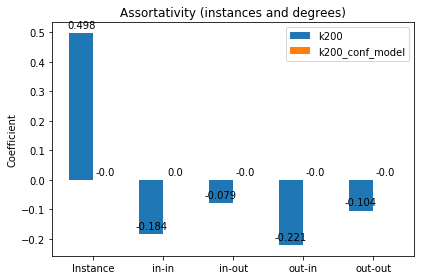

In [94]:
labels = ['Instance','in-in','in-out','out-in','out-out']
k200_coeff_list_round = [round(num, 3) for num in k200_coeff_list]
k200_conf_coeff_list_round = [round(num, 3) for num in k200_conf_coeff_list]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, k200_coeff_list_round, width, label='k200')
rects2 = ax.bar(x + width/2, k200_conf_coeff_list_round, width, label='k200_conf_model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient')
ax.set_title('Assortativity (instances and degrees)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

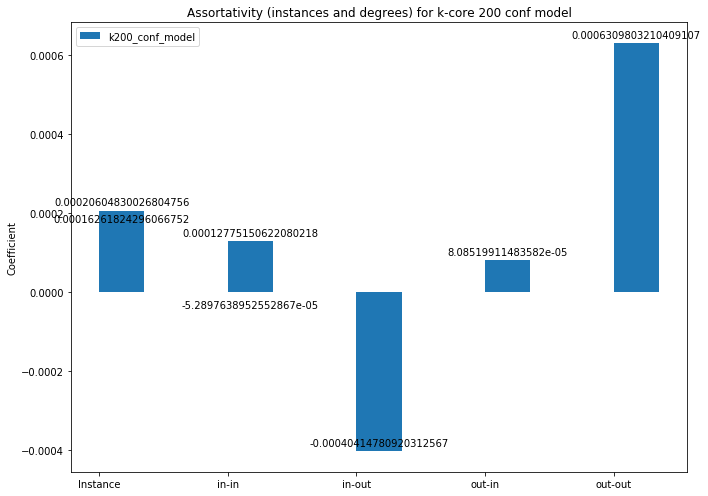

In [173]:
labels = ['Instance','in-in','in-out','out-in','out-out']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, k200_conf_coeff_list, width, label='k200_conf_model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient')
ax.set_title('Assortativity (instances and degrees) for k-core 200 conf model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

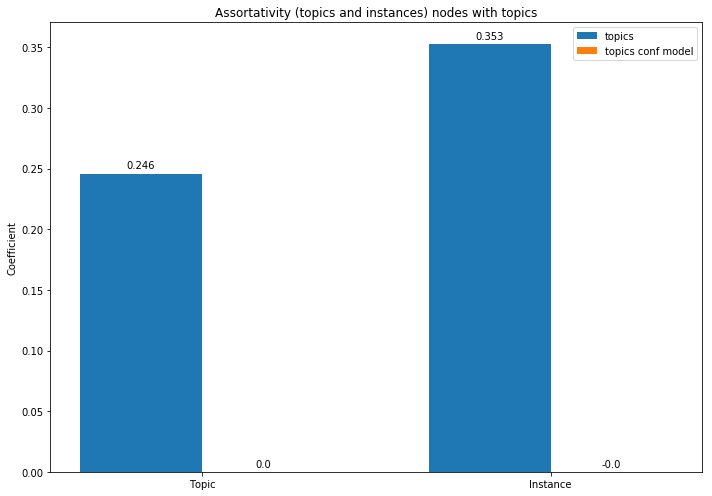

In [174]:
labels = ['Topic','Instance']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [round(num, 3) for num in topic_coeff_list], width, label='topics')
rects2 = ax.bar(x + width/2, [round(num, 3) for num in topic_conf_coeff_list], width, label='topics conf model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient')
ax.set_title('Assortativity (topics and instances) nodes with topics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()